In [2]:
#Modeling the excitatory input

from brian2 import *
start_scope()

#Model parameters (From Angus Chadwick, Mark CW van Rossum,and Matthew F Nolan,Flexible theta sequence compression
#                  mediated via phase precessing interneurons.eLife. 2016 Dec 8; 5: e20349.doi: 10.7554/eLife.20349)



tau_m = 20 *ms
C_m = 155e-12 *farad
tau_gl = 2 *ms
vRest=-65 *mV
vReversal=0 *mV
vThreshold=-50 *mV
VReset=-70 *mV
w=.5e-9 *siemens 
I0_ext=140e-12 *amp
f=8 *Hz

#Gussian Input behavior ( From Chance FS.Hippocampal phase precession from dual input components.
                         # J Neurosci. 2012 Nov 21;32(47):16693-703a. doi: 10.1523/JNEUROSCI.2786-12.2012.)

speed=40 *(cm/second)
Sig=20 *cm
X0_1=90 *cm
X0_2=110 *cm
phi_1=260*(pi/180)
phi_2=100*(pi/180)

#add noise
sigma = 0.1 *mV

#add trial number
spk=([nan])
for trial in range(10):
    
    eqs = '''
    dv/dt = -(v-vRest)/tau_m-(gl)*(v-vReversal)/C_m+Iext/C_m+sigma*xi*tau_m**-0.5 : volt(unless refractory)
    dgl/dt = -gl/tau_gl : siemens

    X=speed*t :meter 
    Iext_1=(((cos(2*pi*f*t-phi_1)+1))/2)*exp(-((X-X0_1)**2)/(2*Sig**2)) : 1
    Iext_2=(((cos(2*pi*f*t-phi_2)+1))/2)*exp(-((X-X0_2)**2)/(2*Sig**2)) : 1
    Iext=(I0_ext)*(Iext_1+Iext_2) : amp
    '''

    G = NeuronGroup(1, eqs, threshold='v> vThreshold', reset='v = VReset', refractory=5*ms, method='euler')
    S = Synapses(G, G, on_pre='gl += w')
    S.connect()

    statemon1 = StateMonitor(G, 'v', record=0)
    statemon2 = StateMonitor(G, 'gl', record=0)
    statemon3 = StateMonitor(G, 'Iext', record=0)
    spikemon = SpikeMonitor(G)

    run(5000*ms)
    
    
    spk=numpy.concatenate((spk,spikemon.t))
    
print ('Number of spike = %s' % len(spk))



Number of spike = 101


Text(0,0.5,'Iext (amp)')

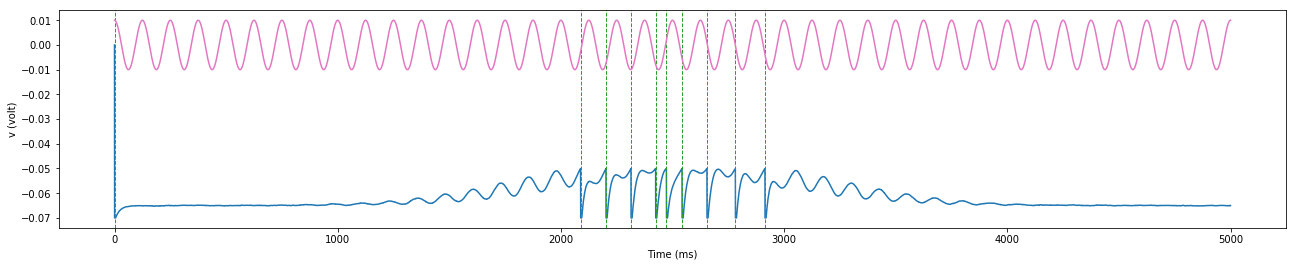

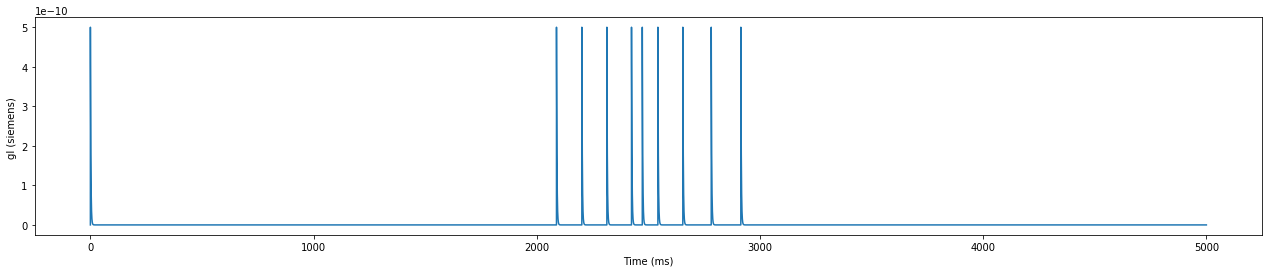

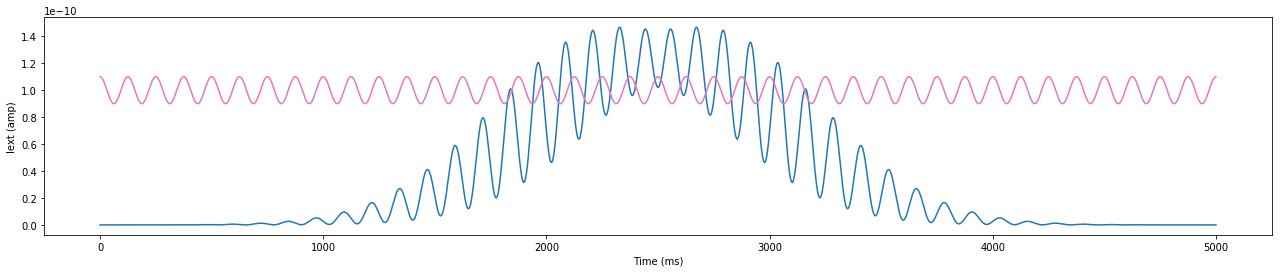

In [3]:
# Plot Voltage(V), Conductance(gl),and Current(I)

figure(figsize=(22,4))
plot(statemon1.t/ms, statemon1.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C2', lw=1)
plot(statemon1.t/ms,.01*cos(2*pi*f*statemon3.t), c='C6')

xlabel('Time (ms)')
ylabel('v (volt)');

figure(figsize=(22,4))
plot(statemon2.t/ms, statemon2.gl[0])
xlabel('Time (ms)')
ylabel('gl (siemens) ')

figure(figsize=(22,4))
plot(statemon3.t/ms, statemon3.Iext[0])
plot(statemon1.t/ms,.1e-10*(cos(2*pi*f*statemon3.t)+10), c='C6')
xlabel('Time (ms)')
ylabel('Iext (amp)')

In [4]:
#Modeling the inhibtory input

from brian2 import *
start_scope()

#Model parameters (From Angus Chadwick, Mark CW van Rossum,and Matthew F Nolan,Flexible theta sequence compression
#                  mediated via phase precessing interneurons.eLife. 2016 Dec 8; 5: e20349.doi: 10.7554/eLife.20349)

tau_m = 40 *ms
C_m = 200e-12 *farad
tau_gl = 10 *ms
vRest=-65 *mV
vReversal=-70 *mV
vThreshold=-50 *mV
VReset=-70 *mV
w=25e-9 *siemens 
I0_ext=79.5e-12 *amp
I0_theat=0.065e-12 *amp
f=8 *Hz

#add noise
sigma = 0.2 *mV

#add trial number
spk=([nan])
for trial in range(10):
    
    eqs = '''
    dv/dt = -(v-vRest)/tau_m-(gl)*(v-vReversal)/C_m+Iext/C_m+sigma*xi*tau_m**-0.5  : volt(unless refractory)
    dgl/dt = -gl/tau_gl : siemens
    Iext=I0_ext-I0_theat*cos(2*pi*f*t) : amp
    '''

    G = NeuronGroup(1, eqs, threshold='v> vThreshold', reset='v = VReset', refractory=1*ms, method='euler')
    S = Synapses(G, G, on_pre='gl += w')
    S.connect()

    statemon1 = StateMonitor(G, 'v', record=0)
    statemon2 = StateMonitor(G, 'gl', record=0)
    statemon3 = StateMonitor(G, 'Iext', record=0)
    statemon3 = StateMonitor(G, 'Iext', record=0)


    spikemon = SpikeMonitor(G)
    run(5000*ms)

    spk=numpy.concatenate((spk,spikemon.t))
    
print ('Number of spike = %s' % len(spk))

WARNING    "t" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 2.9141 * second. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


creating /var/folders/2g/jw8wtxw938g1b33q2nygph8w0000gn/T/weave-farnaz-iBtjBW/python27_intermediate/compiler_cbcf180d94a9c0d22be962babab6add9
#### ['clang', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wstrict-prototypes', '-mmacosx-version-min=10.9', '-fPIC', '-I/include'] #######
ld: warning: directory not found for option '-L/lib'


WARNING    "t" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 2.9141 * second. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


#### ['clang', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wstrict-prototypes', '-mmacosx-version-min=10.9', '-fPIC', '-I/include'] #######
ld: warning: directory not found for option '-L/lib'
#### ['clang', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wstrict-prototypes', '-mmacosx-version-min=10.9', '-fPIC', '-I/include'] #######
ld: warning: directory not found for option '-L/lib'
Number of spike = 372


Text(0,0.5,'Iext (amp)')

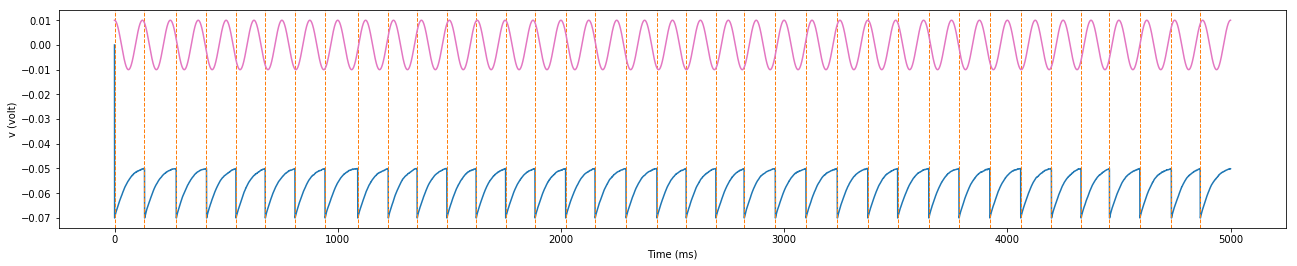

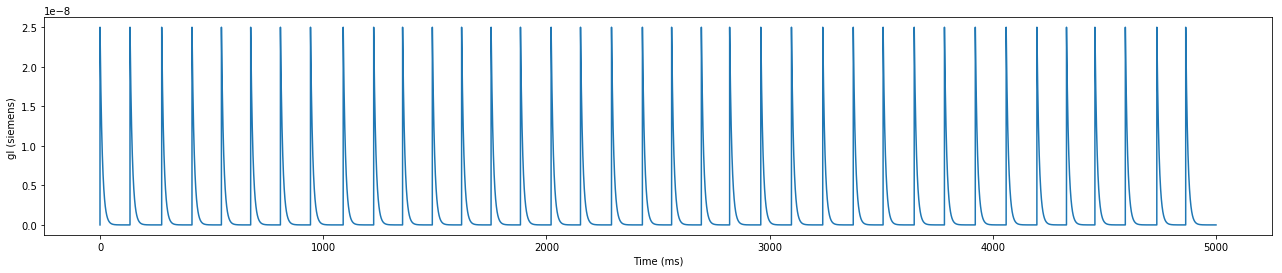

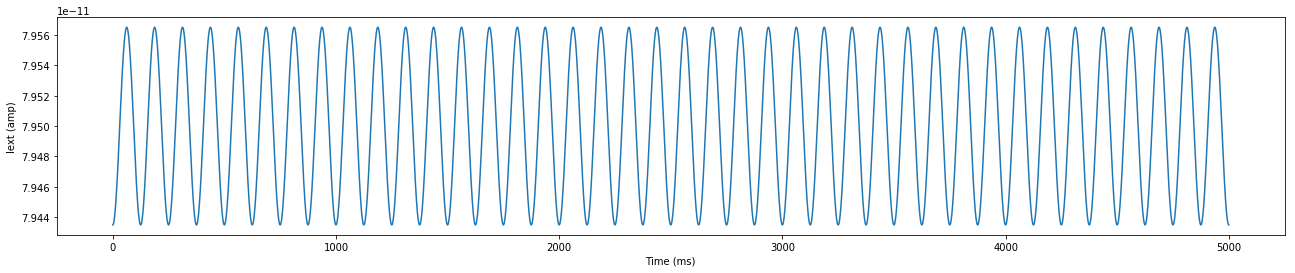

In [5]:
# Plot Voltage(V), Conductance(gl),and Current(I)

figure(figsize=(22,4))
plot(statemon1.t/ms, statemon1.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=1)
plot(statemon1.t/ms,.01*cos(2*pi*f*statemon3.t), c='C6')

xlabel('Time (ms)');
ylabel('v (volt)');

figure(figsize=(22,4))
plot(statemon2.t/ms, statemon2.gl[0])
xlabel('Time (ms)')
ylabel('gl (siemens) ')

figure(figsize=(22,4))
plot(statemon3.t/ms, statemon3.Iext[0])
#plot(statemon1.t/ms,(0.1e-12*cos(2*pi*f*statemon3.t)+.795e-10), c='C6')
xlabel('Time (ms)')
ylabel('Iext (amp)')



In [ ]:
# Save the out put variables in the .mat file
# If you don't have the SciPy package, copy the following line in the terminal:
# python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

#p=np.linspace(0, 2*pi, num=(10000//f))
#phase=np.tile(p, (1,5*second*f))
V= matrix (statemon1.v)
T= matrix (statemon1.t)
Iext= matrix (statemon3.Iext)
#TPVI_E= numpy.concatenate((T, phase, V, Iext))
TPVI_E= numpy.concatenate((T, V, Iext))
spk_E= matrix (spk)

import scipy.io
data = {}
data['TPVI_E'] = TPVI_E
scipy.io.savemat('TPVI_E.mat',data)

data = {}
data['spk_E'] = spk_E
scipy.io.savemat('spk_E.mat',data)



